In [16]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [17]:
# Specify the path of the CSV file to read
my_filepath = "cause_of_deaths.csv"


In [18]:
# Read the file into a variable my_data
my_data = pd.read_csv(my_filepath)


In [19]:
# Print the first five rows of the data
my_data.head(5)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


# Cleaning and formatting of data

In [20]:
my_data.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

Renaming the columns into easier and shorter names to use during analysis

In [21]:
my_data.rename(columns = {'Country/Territory':'country',"Alzheimer's Disease and Other Dementias":"dementias","Parkinson's Disease":"parkinson","Nutritional Deficiencies":"nutrition","Interpersonal Violence":"violence","Maternal Disorders":"maternity","HIV/AIDS":"aids","Drug Use Disorders":"drugs","Cardiovascular Diseases":"heart diseases","Lower Respiratory Infections":"lung infections","Neonatal Disorders":"neonatal","Alcohol Use Disorders":"alcohol","Self-harm":"selfHarm","Exposure to Forces of Nature":"nature","Diarrheal Diseases":"diarrhoea","Environmental Heat and Cold Exposure":"envTemp","Neoplasms":"neoplasms","Conflict and Terrorism":"conflict","Diabetes Mellitus":"diabetes","Chronic Kidney Disease":"kidneyDisease","Poisonings":"poison","Protein-Energy Malnutrition":"proteinMalnutrition","Road Injuries":"roadInjuries","Chronic Respiratory Diseases":"chronicLungDiseases","Cirrhosis and Other Chronic Liver Diseases":"liverDisease","Digestive Diseases":"digestiveDisease","Fire, Heat, and Hot Substances":"heat","Acute Hepatitis":"hepatitis","Lower Respiratory Infections":"lung infections"},inplace=True)
my_data.columns

Index(['country', 'Code', 'Year', 'Meningitis', 'dementias', 'parkinson',
       'nutrition', 'Malaria', 'Drowning', 'violence', 'maternity', 'aids',
       'drugs', 'Tuberculosis', 'heart diseases', 'lung infections',
       'neonatal', 'alcohol', 'selfHarm', 'nature', 'diarrhoea', 'envTemp',
       'neoplasms', 'conflict', 'diabetes', 'kidneyDisease', 'poison',
       'proteinMalnutrition', 'roadInjuries', 'chronicLungDiseases',
       'liverDisease', 'digestiveDisease', 'heat', 'hepatitis'],
      dtype='object')

In [22]:
my_data.rename(columns = {"Code":"code","Year":"year","Meningitis":"meningitis","Tuberculosis":'TB',"Malaria":"malaria"},inplace=True)
my_data.columns

Index(['country', 'code', 'year', 'meningitis', 'dementias', 'parkinson',
       'nutrition', 'malaria', 'Drowning', 'violence', 'maternity', 'aids',
       'drugs', 'TB', 'heart diseases', 'lung infections', 'neonatal',
       'alcohol', 'selfHarm', 'nature', 'diarrhoea', 'envTemp', 'neoplasms',
       'conflict', 'diabetes', 'kidneyDisease', 'poison',
       'proteinMalnutrition', 'roadInjuries', 'chronicLungDiseases',
       'liverDisease', 'digestiveDisease', 'heat', 'hepatitis'],
      dtype='object')

In the next cell, I check to see if the dataset has any null values, as well as the data types of the columns.

In [23]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              6120 non-null   object
 1   code                 6120 non-null   object
 2   year                 6120 non-null   int64 
 3   meningitis           6120 non-null   int64 
 4   dementias            6120 non-null   int64 
 5   parkinson            6120 non-null   int64 
 6   nutrition            6120 non-null   int64 
 7   malaria              6120 non-null   int64 
 8   Drowning             6120 non-null   int64 
 9   violence             6120 non-null   int64 
 10  maternity            6120 non-null   int64 
 11  aids                 6120 non-null   int64 
 12  drugs                6120 non-null   int64 
 13  TB                   6120 non-null   int64 
 14  heart diseases       6120 non-null   int64 
 15  lung infections      6120 non-null   int64 
 16  neonat

# Number of death for each cause from the years 1990 to 2019 
For my visualisation, I will be displaying,for each year, the total number of deaths per listed cause

In [24]:
years = my_data.groupby('year')[['meningitis', 'dementias', 'parkinson',
       'nutrition', 'malaria', 'Drowning', 'violence',
       'maternity', 'aids', 'drugs', 'TB', 'heart diseases', 'lung infections',
       'neonatal', 'alcohol', 'selfHarm', 'nature', 'diarrhoea', 'envTemp',
       'neoplasms', 'conflict', 'diabetes', 'kidneyDisease', 'poison',
       'proteinMalnutrition', 'roadInjuries', 'chronicLungDiseases',
       'liverDisease', 'digestiveDisease', 'heat', 'hepatitis']].agg('sum')
years

,meningitis,dementias,parkinson,nutrition,malaria,Drowning,violence,maternity,aids,drugs,...,diabetes,kidneyDisease,poison,proteinMalnutrition,roadInjuries,chronicLungDiseases,liverDisease,digestiveDisease,heat,hepatitis
year,,,,,,,,,,,,,,,,,,,,,
1990,432253,560616,147156,756808,840297,460460,372497,302419,336059,56133,...,661085,600925,87951,655975,1112770,3092759,1012423,1854392,123123,166343
1991,428621,583166,150875,729145,858984,454375,383689,298271,430725,61890,...,679630,613589,87813,631013,1117024,3148288,1026870,1877515,123941,165276
1992,426440,605894,154886,700664,856415,447056,407176,299300,540070,66826,...,702253,630160,88435,606015,1125566,3207816,1042953,1903759,124995,163687
1993,420836,629571,160249,674219,862216,445434,432858,293564,664463,71603,...,728077,647255,90036,583919,1137444,3266612,1067730,1939556,127493,161899
1994,413799,652176,164381,649801,855671,443350,441971,293148,800169,76717,...,751254,665365,90897,564046,1153642,3297292,1089331,1967669,129611,159423
1995,409826,674815,168882,723095,862626,437303,444246,290551,938440,79985,...,773490,683701,90353,641084,1162799,3313295,1104380,1984263,128523,157173
1996,417259,696665,173822,671977,872476,423296,432673,287746,1061580,81704,...,799023,704624,88861,593826,1162809,3342591,1115241,1995513,126804,153406
1997,400893,717342,179347,647682,892946,413405,427316,289467,1174154,82572,...,827734,731048,87371,572372,1169798,3381872,1128962,2014659,126274,151902
1998,393364,738768,185097,620498,901338,407205,431984,289304,1303651,85087,...,854415,758681,86679,549543,1177827,3401426,1141509,2030600,124746,149563


In [25]:
years.columns

Index(['meningitis', 'dementias', 'parkinson', 'nutrition', 'malaria',
       'Drowning', 'violence', 'maternity', 'aids', 'drugs', 'TB',
       'heart diseases', 'lung infections', 'neonatal', 'alcohol', 'selfHarm',
       'nature', 'diarrhoea', 'envTemp', 'neoplasms', 'conflict', 'diabetes',
       'kidneyDisease', 'poison', 'proteinMalnutrition', 'roadInjuries',
       'chronicLungDiseases', 'liverDisease', 'digestiveDisease', 'heat',
       'hepatitis'],
      dtype='object')

In [26]:
years.index

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='year')

The causes of death are a quite a number and plotting them on a single graph would prevent easy follow-along and viewing of data. But plotting them alone provides insights but not a lot. Grouping similar causes of death together would provide for more insightful analysis and comparison of these listed death causes.

So the next cell has the causes of death being grouped together into lists depending on similarities I notice from my point of view.

In [27]:
#these are ailments that usually affect a person in their older age
degenerative = years[['dementias','parkinson']] 

# this group deals with death from external stimuli to the body
external = years[['malaria','poison','drugs','alcohol','Drowning','selfHarm','roadInjuries']] 

#this group is to do with the lungs/respiratory system
lung = years[['chronicLungDiseases','TB','lung infections']] 

#this group is to do with severe ailments which once discovered must be treated as promptly as possible
# NB: neoplasms refers to cancers
severe = years[['heart diseases','neoplasms','meningitis','aids']]

#this group contains causes that are birth related
# NB: neonatal refers to Neonatal Disorders which is disturbance of normal state of body, organs and abnormal function of a newborn.
birth = years[['maternity','neonatal']]

#this group is to do with the digestive system/what we eat
# NB: neonatal refers to Neonatal Disorders which is disturbance of normal state of body, organs and abnormal function of a newborn.
foodRelated = years[['diarrhoea','digestiveDisease','proteinMalnutrition','diabetes','nutrition','kidneyDisease','hepatitis','liverDisease']]

#this group is to do with natural elements/the environment
environment = years[['nature','heat','envTemp']]

#this group is to do with violence/fighting between people
fight = years[['conflict','violence']]



In the next cell, the lists created previously are all stored into one list

In [28]:
df_list = [degenerative,external,lung,severe,birth,foodRelated,environment,fight]

## Step 4: Visualize the data

In the next code cell, I'm using subplots to plot the data. Each subplot contains one group of related causes of death, groups that were previously created.

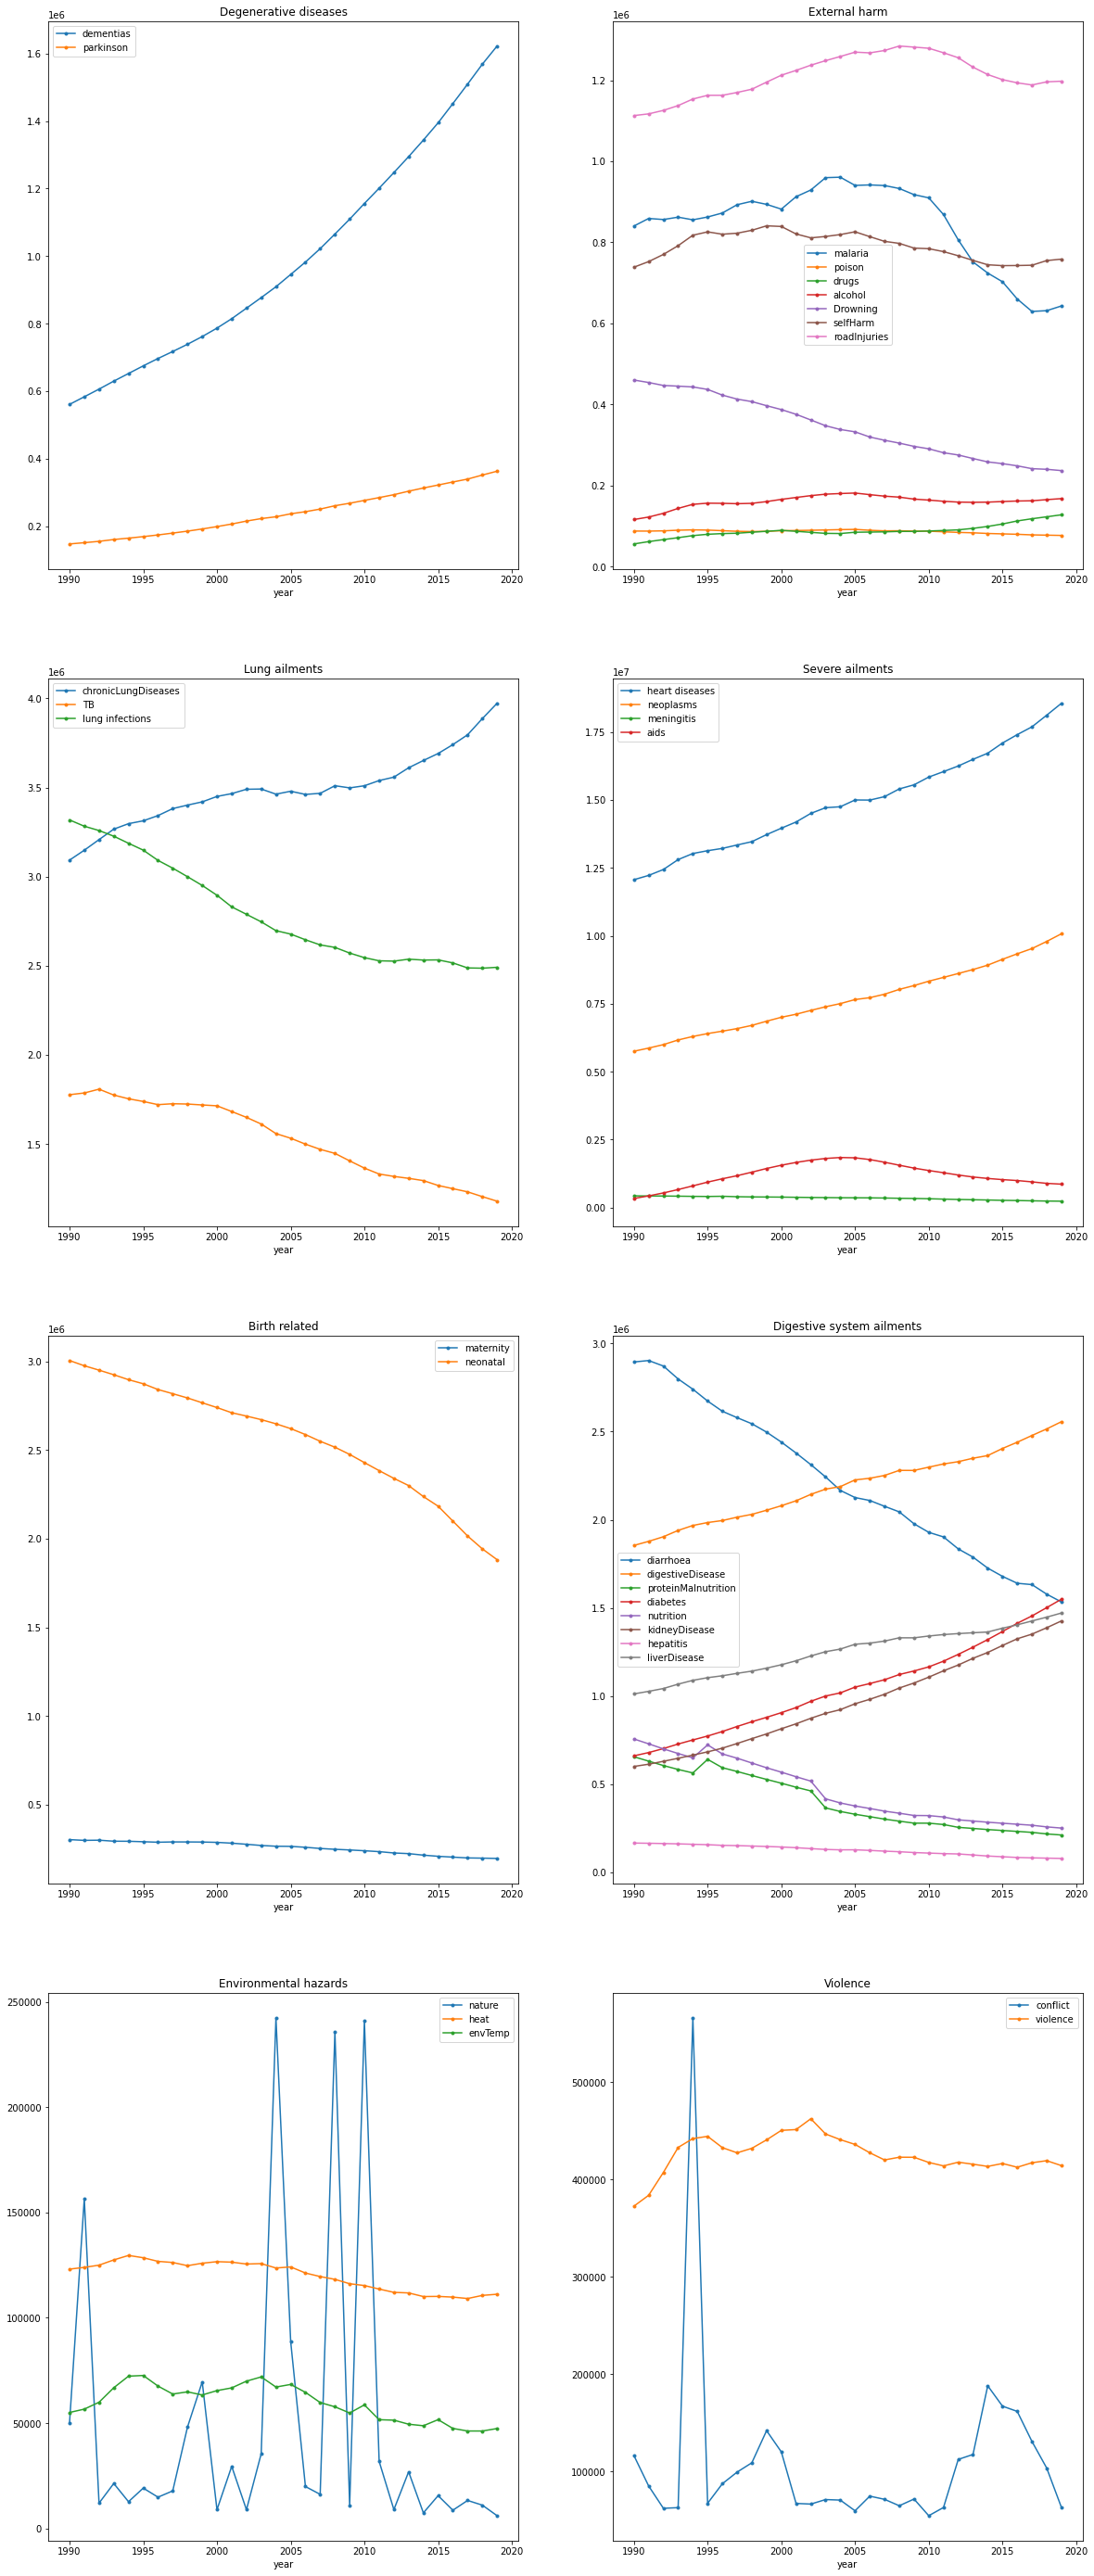

In [29]:
# Create a plot
nrow=4
ncol=2

fig, axes = plt.subplots(nrow,ncol,figsize=(20, 50))
#x = my_data.index


#sns.lineplot(years.index, years[['meningitis','parkinson']], data=years, ax=axes[0][1]) 
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c],marker = '.')
        count+=1
        
axes[0,0].title.set_text('Degenerative diseases')
axes[0,1].title.set_text('External harm')
axes[1,0].title.set_text('Lung ailments')
axes[1,1].title.set_text('Severe ailments')
axes[2,0].title.set_text('Birth related')
axes[2,1].title.set_text('Digestive system ailments')
axes[3,0].title.set_text('Environmental hazards')
axes[3,1].title.set_text('Violence')


<AxesSubplot: xlabel='year', ylabel='maternity'>

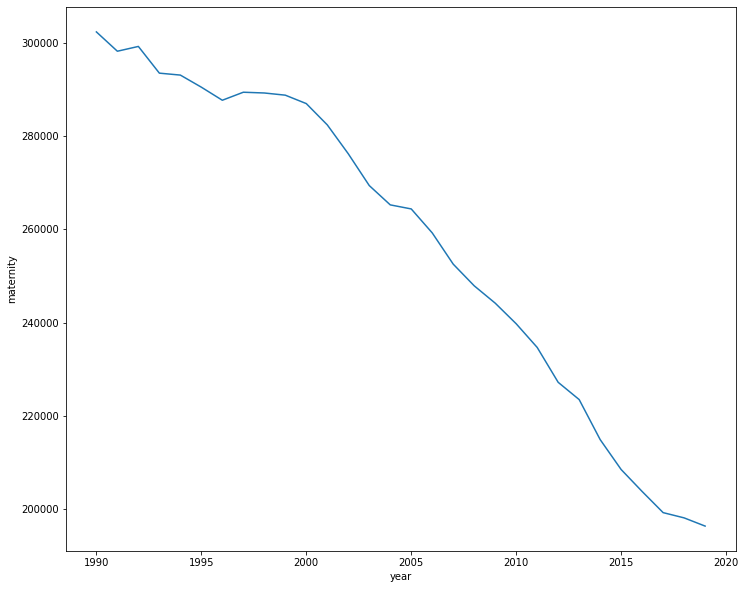

In [30]:
#this code cell is to view a particular cause of death more closely e.g get exact numbers, study the 
#years with more detail
#the graph below shows the maternity deaths in closer detail over the years
plt.figure(figsize=(12,10))

sns.lineplot(x=years.index,y=years['maternity'])

